In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [137]:
olimpic = pd.read_csv("olimpic.csv.zip")
region = pd.read_csv("region_kr1.csv")

olimpic = olimpic[olimpic.Season == "Winter"]

In [138]:
display(olimpic.head())
display(region.head(4))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN


In [139]:
olimpics = olimpic.merge(region, on = "NOC")
print(olimpics.info())
olimpics.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48506 entries, 0 to 48505
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      48506 non-null  int64  
 1   Name    48506 non-null  object 
 2   Sex     48506 non-null  object 
 3   Age     48221 non-null  float64
 4   Height  40220 non-null  float64
 5   Weight  39513 non-null  float64
 6   Team    48506 non-null  object 
 7   NOC     48506 non-null  object 
 8   Games   48506 non-null  object 
 9   Year    48506 non-null  int64  
 10  Season  48506 non-null  object 
 11  City    48506 non-null  object 
 12  Sport   48506 non-null  object 
 13  Event   48506 non-null  object 
 14  Medal   5695 non-null   object 
 15  region  48506 non-null  object 
 16  notes   583 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 6.3+ MB
None


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
2,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [140]:
oldmen = olimpics[(olimpics.Age >= 50) & (olimpics.Age <= 60) & (olimpics.Sex == "M")]
print("Участников:", oldmen.ID.count())
oldmen[["City", "Medal"]].groupby("City").count()

Участников: 20


,Medal
City,
Chamonix,4
Grenoble,0
Innsbruck,0
Lake Placid,0
Nagano,1
Sankt Moritz,0
Sarajevo,0
Sochi,0
Torino,0


In [142]:
olimpics.groupby("Medal").ID.count().reindex(["Gold", "Silver", "Bronze"])

Medal
Gold      1913
Silver    1896
Bronze    1886
Name: ID, dtype: int64

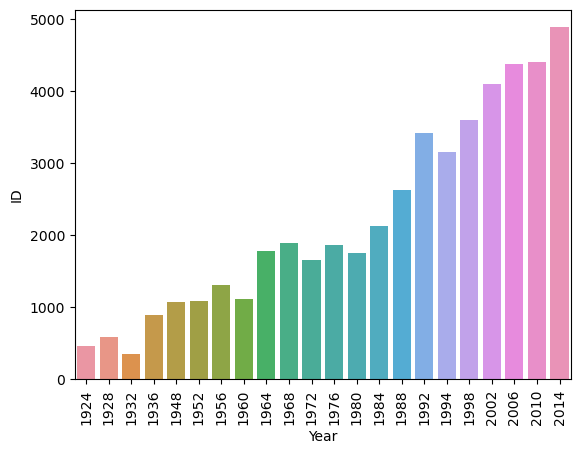

In [144]:
mens = olimpics[olimpics.Sex == "M"]
mens = olimpics[["ID", "Year"]].groupby("Year").count().reset_index()
sns.barplot(x = mens.Year, y = mens.ID)
plt.xticks(rotation=90)
plt.show()

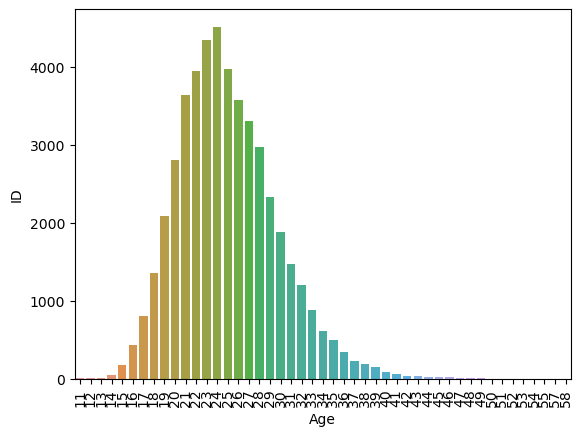

In [146]:
part = olimpics[["ID", "Age"]].groupby("Age").count().reset_index()
part.Age = part.Age.apply(lambda x: int(x))
sns.barplot(x = part.Age, y = part.ID)
plt.xticks(rotation=90)
plt.show()

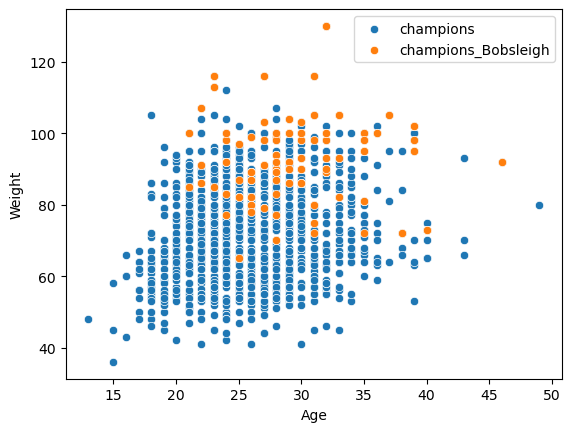

In [148]:
champions = olimpics[olimpics.Medal == "Gold"]
sns.scatterplot(data = champions, x = champions.Age, y = champions.Weight, label="champions")
Bob = champions[champions.Sport == "Bobsleigh"]
sns.scatterplot(data = Bob, x = Bob.Age, y = Bob.Weight, label="champions_Bobsleigh")
plt.legend()
plt.show()

In [150]:
olimpics_winter = olimpics[(olimpics.Year <=2000) & (olimpics.Year >= 1980)]
olimpics_winter = olimpics_winter.replace({"Gold":3, "Silver":2, "Bronze":1})
olimpics_winter.Medal.unique()

array([nan,  3.,  2.,  1.])

In [152]:
top_5 = olimpics_winter.groupby("region").Medal.sum().sort_values(ascending=False)[:5]
top_5 = list(top_5.index)
top_5

['Russia', 'Germany', 'USA', 'Canada', 'Norway']

In [154]:
besties = olimpics_winter.pivot_table(values='Medal', index="City", columns="region", aggfunc="sum")
besties[top_5]

region,Russia,Germany,USA,Canada,Norway
City,,,,,
Albertville,139.0,83.0,31.0,74.0,52.0
Calgary,160.0,96.0,12.0,8.0,17.0
Lake Placid,119.0,92.0,82.0,3.0,22.0
Lillehammer,87.0,86.0,39.0,72.0,63.0
Nagano,112.0,100.0,88.0,105.0,81.0
Sarajevo,129.0,87.0,22.0,9.0,32.0
